In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

F = len("Agnieszka")
L = len("Welian")

## Excercise 1 - Divergence problem

In [2]:
stan_data = {
    'N':1,
    'y':[1]
}

stan_data1 = {
    'N':15,
    'y':[1] * (F+L)
}


INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_1.stan to exe file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_1.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_1.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)











chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



Processing csv files: C:\Users\AGNIES~1\AppData\Local\Temp\tmpoqhpv37b\code_1-20220319181543_1.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpoqhpv37b\code_1-20220319181543_2.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpoqhpv37b\code_1-20220319181543_3.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpoqhpv37b\code_1-20220319181543_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
2804 of 4000 (70.10%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)









chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



Processing csv files: C:\Users\AGNIES~1\AppData\Local\Temp\tmpoqhpv37b\code_1-20220319181548_1.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpoqhpv37b\code_1-20220319181548_2.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpoqhpv37b\code_1-20220319181548_3.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpoqhpv37b\code_1-20220319181548_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
2804 of 4000 (70.10%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

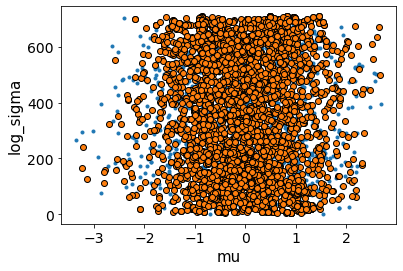

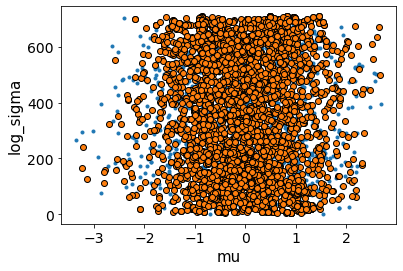

In [3]:
model1_1 = CmdStanModel(stan_file = 'code_1.stan')
sample1 = model1_1.sample(stan_data, seed=9012022)
print(sample1.diagnose())

model_more_samples = CmdStanModel(stan_file = 'code_1.stan')
more_samples = model_more_samples.sample(stan_data, seed=9012022)
print(more_samples.diagnose())

result_less_samples = az.from_cmdstanpy(posterior=sample1)
#Calculating log sigma
post = result_less_samples.posterior
post["log_sigma"] = np.log(post["sigma"])
result_less_samples

az.plot_pair(result_less_samples, var_names=['mu', 'log_sigma'], divergences=True)

result_more_samples = az.from_cmdstanpy(posterior=more_samples)
#Calculating log sigma
post = result_more_samples.posterior
post["log_sigma"] = np.log(post["sigma"])
result_more_samples

az.plot_pair(result_more_samples, var_names=['mu', 'log_sigma'], divergences=True)


## Excersize 2 - Binominial example

In [5]:
df = pd.read_csv('coin.csv')
y = df.index.stop
N = df['Toss_Result']

model = CmdStanModel(stan_file='code_2.stan')
result = model.sample(data={"N" : N, "y" : y}, seed = 9012022, chains = 4)

result.summary()

#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result
az.plot_density(arviz_result,shade=0.1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=N; dims declared=(); dims found=(418) (in 'C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab3/code_2.stan', line 2, column 4 to column 20)
Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=N; dims declared=(); dims found=(418) (in 'C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab3/code_2.stan', line 2, column 4 to column 20)
Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=N; dims declared=(); dims found=(418) (in 'C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab3/code_2.stan', line 2, column 4 to column 20)
Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=N; dims declared=(); dims found=(418) (in 'C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab3/code_2.stan', line 2, column 4 to column 20)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['C:\\Users\\Agnieszka\\Desktop\\Sem 8\\Data Analytics\\DataA\\Data-Analytics\\Lab3\\code_2.exe', 'id=1', 'random', 'seed=9012022', 'data', 'file=C:\\Users\\AGNIES~1\\AppData\\Local\\Temp\\tmpoqhpv37b\\erho2lo8.json', 'output', 'file=C:\\Users\\AGNIES~1\\AppData\\Local\\Temp\\tmpoqhpv37b\\code_2-20220319181656_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	C:\Users\AGNIES~1\AppData\Local\Temp\tmpoqhpv37b\code_2-20220319181656_1.csv
 console_msgs (if any):
	C:\Users\AGNIES~1\AppData\Local\Temp\tmpoqhpv37b\code_2-20220319181656_0-stdout.txt

Excersize 3 - Predictive checks

In [4]:
df = pd.read_csv('normal.csv')
y = df.index.stop
N = df['value']

100


0    -0.039
1     1.085
2    -2.794
3     1.652
4     1.380
      ...  
95    0.191
96    0.461
97    0.103
98    0.706
99    1.382
Name: value, Length: 100, dtype: float64

In [6]:
model = CmdStanModel(stan_file='code_3.stan')
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

result.summary()

arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_3.stan to exe file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_3.exe


ValueError: Unable to compile Stan model file: C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_3.stan.